In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Installing the libraries
! pip install seaborn
! pip install wordcloud
! pip install plotly

In [ ]:
# Importing the libraries which will be used in the Project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import re

In [ ]:
# Reading the csv file
df = pd.read_csv("/content/gdrive/MyDrive/tripadvisor_hotel_reviews.csv")

In [ ]:
df.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [ ]:
# Reading the shape of the file
df.shape

(20491, 2)

In [ ]:
# Getting the information of the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
# Verifying the null values.
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [ ]:
df["Rating"].describe().round(2)

count    20491.00
mean         3.95
std          1.23
min          1.00
25%          3.00
50%          4.00
75%          5.00
max          5.00
Name: Rating, dtype: float64

In [ ]:
# Value Counts for various ratings
df["Rating"].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

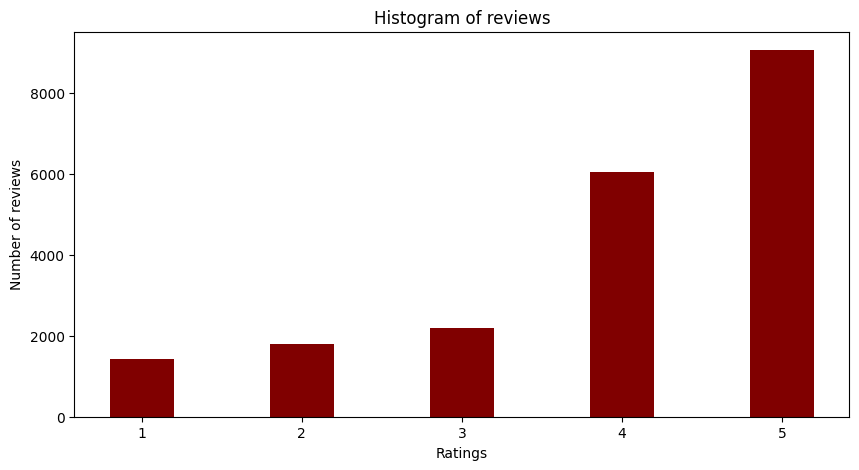

In [ ]:
# Assigning values
data = {'1': 1421, '2': 1793, '3': 2184,
        '4': 6039, '5':9054}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(courses, values, color='maroon',
        width=0.4)

plt.xlabel("Ratings")
plt.ylabel("Number of reviews")
plt.title("Histogram of reviews")
plt.show()

In [ ]:
# Adding new column in data
df['Length'] = df['Review'].apply(len)
df.head()

Review  Rating  Length
0  nice hotel expensive parking got good deal sta...       4     593
1  ok nothing special charge diamond member hilto...       2    1689
2  nice rooms not 4* experience hotel monaco seat...       3    1427
3  unique, great stay, wonderful time hotel monac...       5     600
4  great stay great stay, went seahawk game aweso...       5    1281

In [ ]:
df["Length"].describe().round(3)

count    20491.000
mean       724.897
std        689.101
min         44.000
25%        339.000
50%        537.000
75%        859.000
max      13501.000
Name: Length, dtype: float64

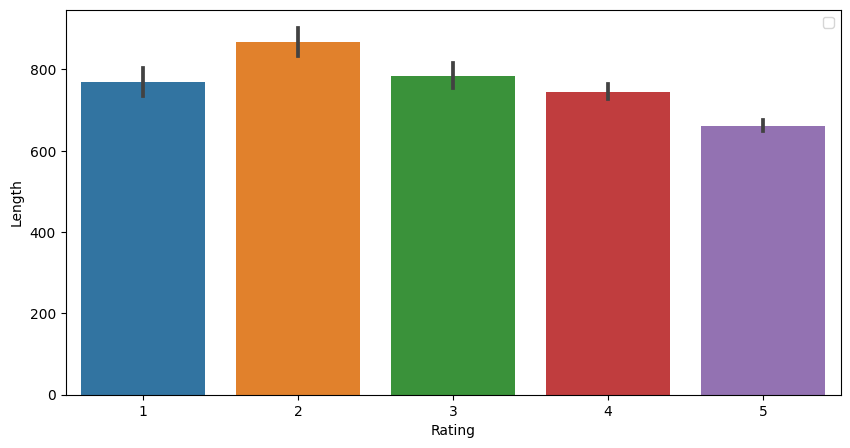

In [ ]:
# Creating barplot
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="Rating", y="Length")
plt.legend()

In [ ]:
# Creating scatterplot
fig=px.scatter(df,x="Rating",y="Length", color="Rating")
fig.show()

In [ ]:
df_5 =df[df["Rating"]==5]
df_5

Review  Rating  Length
3      unique, great stay, wonderful time hotel monac...       5     600
4      great stay great stay, went seahawk game aweso...       5    1281
5      love monaco staff husband stayed hotel crazy w...       5    1002
6      cozy stay rainy city, husband spent 7 nights m...       5     748
8      hotel stayed hotel monaco cruise, rooms genero...       5     419
...                                                  ...     ...     ...
20473  best best reason affordable better hotels city...       5     152
20476  night not trust not disappointed stay hotel, s...       5    1082
20480  great play stay stay loyal inn package deal ha...       5     256
20482  great choice wife chose best western quite bit...       5     716
20486  best kept secret 3rd time staying charm, not 5...       5     733

[9054 rows x 3 columns]

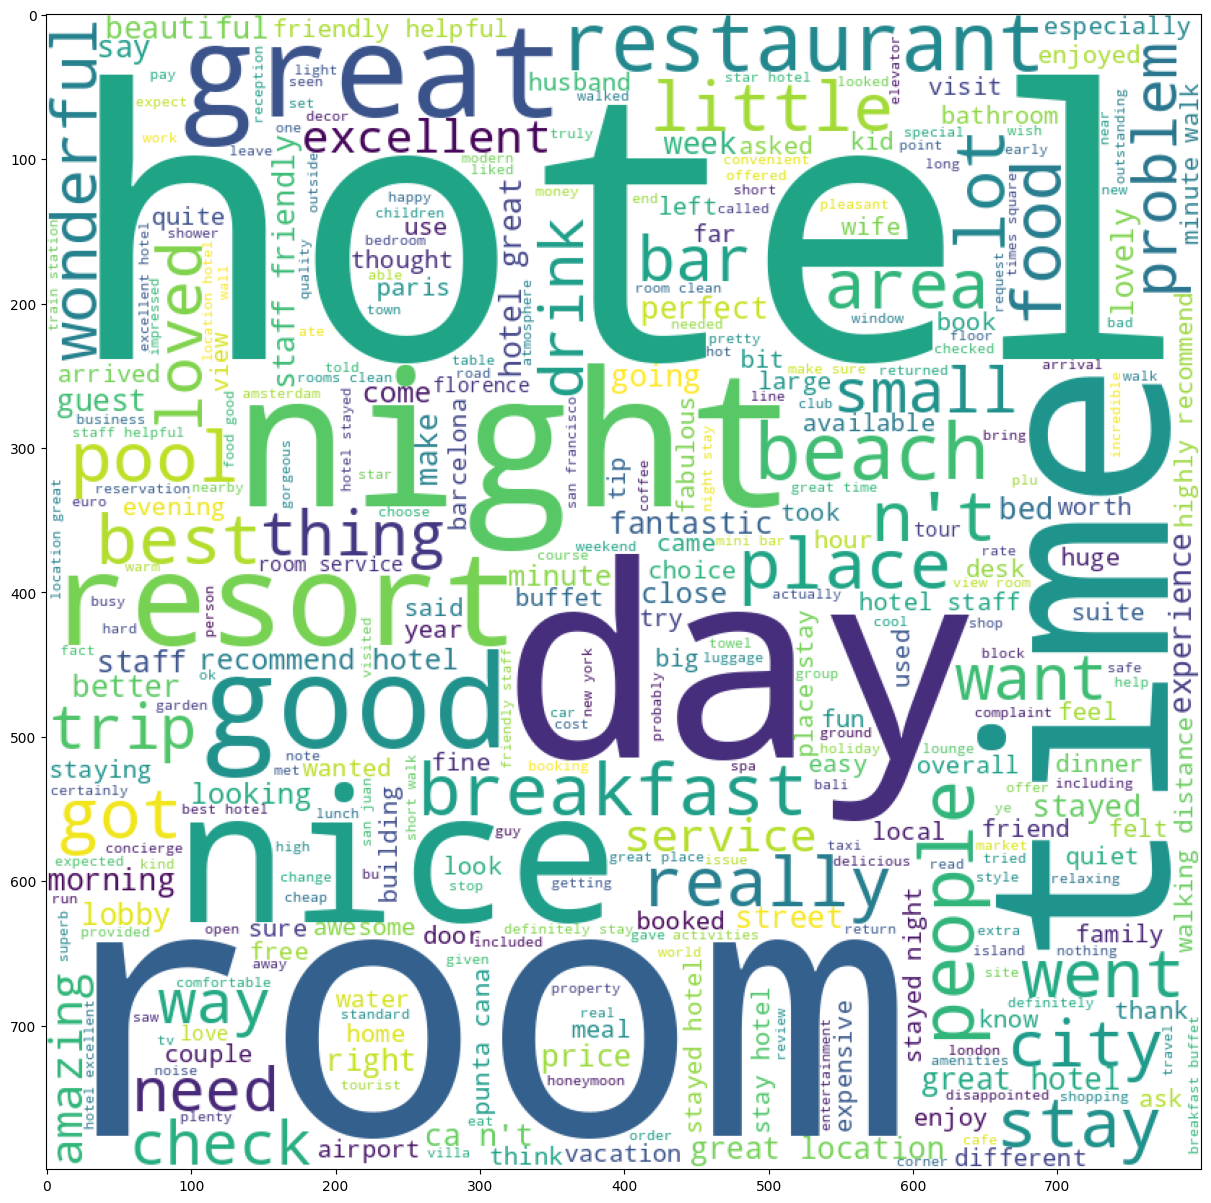

In [ ]:

plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=800,background_color="white").generate(' '.join(df_5['Review']))

plt.imshow(wc1)

In [ ]:
df_4 = df[df["Rating"]==4]
df_4

Review  Rating  Length
0      nice hotel expensive parking got good deal sta...       4     593
7      excellent staff, housekeeping quality hotel ch...       4     597
11     nice value seattle stayed 4 nights late 2007. ...       4     364
12     nice hotel good location hotel kimpton design ...       4     569
14     great hotel night quick business trip, loved l...       4     202
...                                                  ...     ...     ...
20475  good stay spent night pacific northwest/northe...       4     441
20477  nice hotel pioneer square area stayed late aug...       4     454
20478  just fine, hotel located pioneer square just q...       4     727
20483  good bed clean convenient just night happy sta...       4     420
20487  great location price view hotel great quick pl...       4     306

[6039 rows x 3 columns]

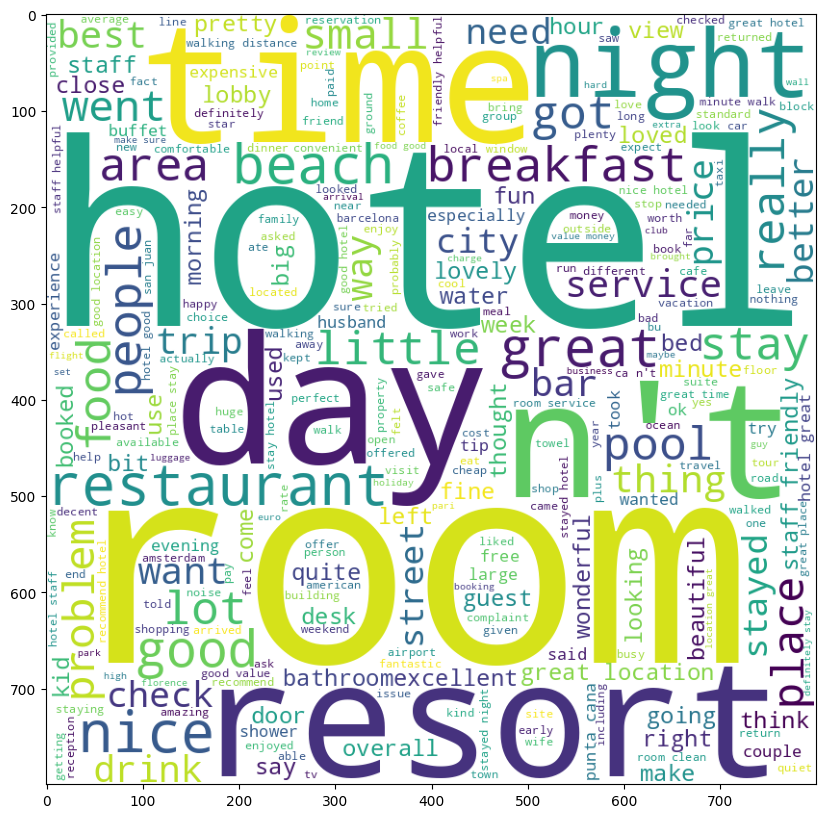

In [ ]:
plt.figure(figsize=(10,10))
wc1 = WordCloud(max_words=1200, min_font_size=10,
                height=800,width=800,background_color="white").generate(' '.join(df_4['Review']))

plt.imshow(wc1)

In [ ]:
df_3 = df[df["Rating"]==3]
df_3

Review  Rating  Length
2      nice rooms not 4* experience hotel monaco seat...       3    1427
13     nice hotel not nice staff hotel lovely staff q...       3     417
19     hmmmmm say really high hopes hotel monaco chos...       3    1025
25     n't mind noise place great, read reviews noise...       3     482
27     met expectations centrally located hotel block...       3     538
...                                                  ...     ...     ...
20406  good good great location new clean modern bath...       3     376
20408  ok ok. room clean tidy, staff friendly, good h...       3     165
20419  nice try stayed hotel day grand opening, booke...       3     699
20446  ok short stay booked hotel night stopover, sin...       3     566
20458  perfect ca n't beat location, beach incredible...       3     180

[2184 rows x 3 columns]

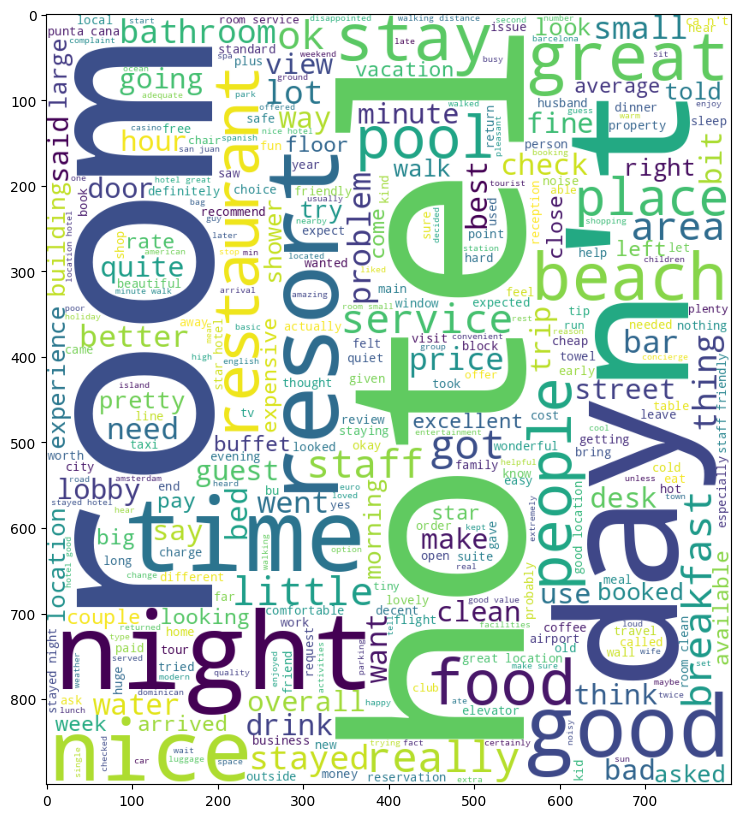

In [ ]:
plt.figure(figsize=(10,10))
wc1 = WordCloud(max_words=800, min_font_size=10,
                height=900,width=800,background_color="white").generate(' '.join(df_3['Review']))

plt.imshow(wc1)

In [ ]:
df_2 = df[df["Rating"]==2]
df_2

Review  Rating  Length
1      ok nothing special charge diamond member hilto...       2    1689
10     poor value stayed monaco seattle july, nice ho...       2     333
16     disappointed say anticipating stay hotel monac...       2    1662
24     great location need internally upgrade advanta...       2     250
33     good location poor cleanliness warwick hotel g...       2     576
...                                                  ...     ...     ...
20481  ok price look hotel ok little run average clea...       2     247
20484  deceptive staff deceptive desk staff claiming ...       2     695
20485  not impressed unfriendly staff checked asked h...       2     616
20488  ok just looks nice modern outside, desk staff ...       2     443
20490  people talking, ca n't believe excellent ratin...       2     620

[1793 rows x 3 columns]

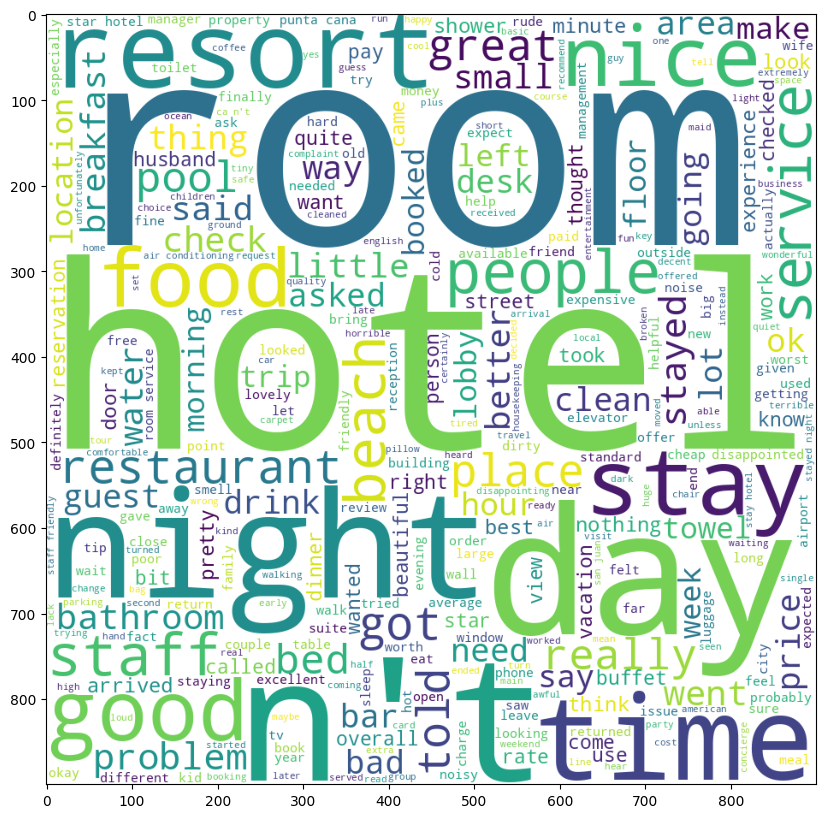

In [ ]:
plt.figure(figsize=(10,10))
wc1 = WordCloud(max_words=1500, min_font_size=10,
                height=900,width=900,background_color="white").generate(' '.join(df_2['Review']))

plt.imshow(wc1)

In [ ]:
df_1 = df[df["Rating"]==1]
df_1

Review  Rating  Length
15     horrible customer service hotel stay february ...       1    1411
32     noise airconditioner-a standard, arranged stay...       1     614
40     bad choice, booked hotel hot wire called immed...       1     861
65     hated inn terrible, room-service horrible staf...       1     133
69     ace grunge lives does mold mildew tiny bed met...       1      84
...                                                  ...     ...     ...
20421  worst sleep hip tooooo hip nite club building ...       1     342
20460  june 08 stay stayed hotel june 6/6-6/8/08, rea...       1     682
20465  not stay hotel brought group february worst ho...       1     305
20467  returning la concha nightmare surprising hotel...       1     460
20489  hotel theft ruined vacation hotel opened sept ...       1    5557

[1421 rows x 3 columns]

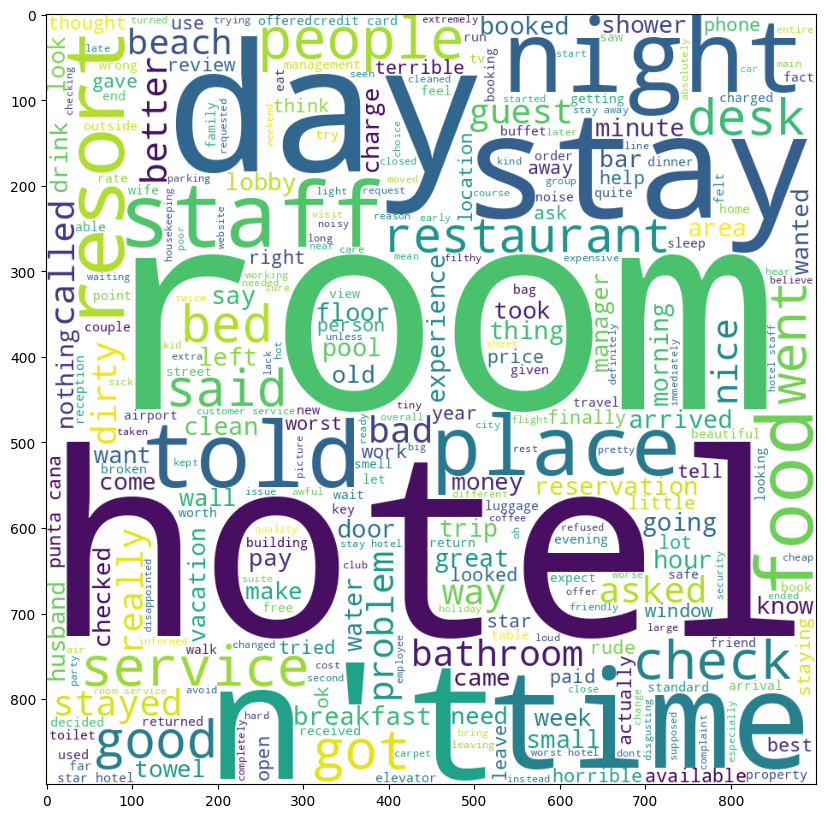

In [ ]:
plt.figure(figsize=(10,10))
wc1 = WordCloud(max_words=1000, min_font_size=10,
                height=900,width=900,background_color="white").generate(' '.join(df_1['Review']))

plt.imshow(wc1)

In [ ]:
# Creating a new Function
def ratings(rating):
  if rating>3 and rating<=5:
    return "Positive"
  elif rating==3:
    return "Netural"
  elif rating>0 and rating<3:
    return "Negative"

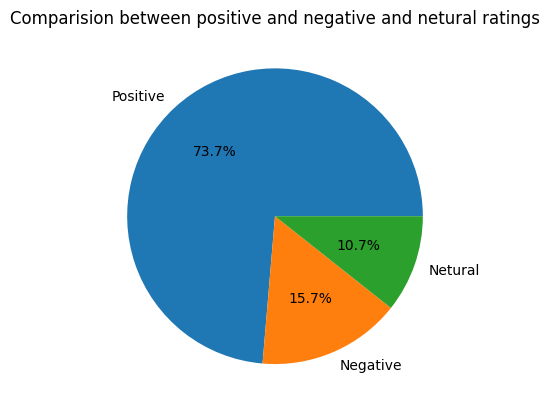

In [ ]:
# Creating pie plot
df['Rating'] = df['Rating'].apply(ratings)
plt.pie(df['Rating'].value_counts(),labels = df['Rating'].unique().tolist(),autopct = '%1.1f%%')
plt.title("Comparision between positive and negative and netural ratings")
plt.show()

In [ ]:
a = df.iloc[0,0]
a

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [ ]:
! pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/54/71/b85c050a8b6a552261e9deae23ba20099852cfbcc9819a628ce64f5a0db6/regex-2023.10.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached regex-2023.10.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
Using cached regex-2023.10.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (773 kB)


In [ ]:
# import library for Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [ ]:
# remove any symbol and cover letter to lowercase
a = re.sub('[a-zA-Z0-9]',' ', a)
a = a.lower().split()
a

[',', ',', ',', '-', ',', ',', ',', ',', ',', ',', ',', ',']

In [ ]:
# download the stopword from nlit library
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Verifying Stopwords
SW = set(stopwords.words('english'))
print(SW)

{'are', 'wouldn', 'more', 'most', 'mightn', 'then', 'don', 'about', 'at', 'shan', 'just', 'what', 'their', "wouldn't", "you're", "that'll", 'can', 'have', 's', 'that', 'nor', 'you', "mightn't", 'is', 've', 'will', 'to', 'am', 'weren', "should've", 'in', "mustn't", 'these', 'down', 'yourself', 'had', "wasn't", 'theirs', 'his', 'same', 'won', "don't", 'm', 'our', 'if', 'it', 'd', 'before', 'further', "you'd", 'now', "haven't", 'only', 'each', 'its', "needn't", 'does', 'ours', 'ain', 'once', 'she', 'here', 'he', 'when', 'o', 'between', 'haven', 'from', 'under', 'because', 'those', 'up', 'off', 'me', 'll', 'few', 'hers', 'hasn', 'mustn', 'into', 'did', 'very', 'as', "hadn't", "you've", 'having', 'until', 'we', 'itself', 'your', 'aren', 'do', 'a', 'out', 'after', 't', 'should', 'which', 'hadn', 'below', "won't", 'isn', "doesn't", "shouldn't", 'who', 'doesn', "shan't", 'for', 'himself', "hasn't", "she's", "isn't", 'both', 'with', "it's", 'were', 'i', 'some', 'couldn', "weren't", 'didn', 'our

In [ ]:
# made loop for clean reviews - based on the stopwords
clean_word=[i for i in a if not i in SW]
clean_word

[',', ',', ',', '-', ',', ',', ',', ',', ',', ',', ',', ',']

In [ ]:
#now we need to make sentence - list
sen = ' '.join(clean_word)
sen

', , , - , , , , , , , ,'

In [ ]:
# defined function for clean all reviews in the data set
def t_process(a):
  a = re.sub('[^a-zA-Z]',' ',a)
  a = a.lower().split()
  ps= PorterStemmer()
  clean_word=[ps.stem(i) for i in a if not i in SW]
  sen=' '.join(clean_word)
  return sen

In [ ]:
# add new column about the reviews after cleaning
df['clean_word']=df["Review"].apply(t_process)
df.head()

Review    Rating  Length  \
0  nice hotel expensive parking got good deal sta...  Positive     593   
1  ok nothing special charge diamond member hilto...  Negative    1689   
2  nice rooms not 4* experience hotel monaco seat...   Netural    1427   
3  unique, great stay, wonderful time hotel monac...  Positive     600   
4  great stay great stay, went seahawk game aweso...  Positive    1281   

                                          clean_word  
0  nice hotel expens park got good deal stay hote...  
1  ok noth special charg diamond member hilton de...  
2  nice room experi hotel monaco seattl good hote...  
3  uniqu great stay wonder time hotel monaco loca...  
4  great stay great stay went seahawk game awesom...

In [ ]:
# Length of word in sentence
df['Length 2'] = df['clean_word'].apply(len)
df.head()

Review    Rating  Length  \
0  nice hotel expensive parking got good deal sta...  Positive     593   
1  ok nothing special charge diamond member hilto...  Negative    1689   
2  nice rooms not 4* experience hotel monaco seat...   Netural    1427   
3  unique, great stay, wonderful time hotel monac...  Positive     600   
4  great stay great stay, went seahawk game aweso...  Positive    1281   

                                          clean_word  Length 2  
0  nice hotel expens park got good deal stay hote...       481  
1  ok noth special charg diamond member hilton de...      1407  
2  nice room experi hotel monaco seattl good hote...      1174  
3  uniqu great stay wonder time hotel monaco loca...       506  
4  great stay great stay went seahawk game awesom...      1058

In [ ]:

df.describe().round(2)

Length  Length 2
count  20491.0  20491.00
mean     724.9    597.84
std      689.1    564.26
min       44.0     31.00
25%      339.0    282.00
50%      537.0    444.00
75%      859.0    709.00
max    13501.0  11189.00

In [ ]:
# Importing Various libraries for use
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import  MLPClassifier




In [ ]:

# Importing CounterVectorizer
cv = CountVectorizer()
x = cv.fit_transform(df["clean_word"]).toarray()
y = df["Rating"]

What is an N-gram?
An n-gram is sequence of n words in a text. Most words by themselves may not present the entire context. Typically adverbs such as 'most' or 'very' are used to modify verbs and adjectives. Therefore, n-grams help analyse phrases and not just words which can lead to better insights.

A Bi-gram means two words in a sequence. 'Very good' or 'Too great'
A Tri-gram means three words in a sequence. 'How was your day' would be broken down to 'How was your' and 'was your day'.

For separating text into n-grams, we will use CountVectorizer from Sklearn

In [ ]:
# Creating Bigrams
cv= CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['Review'])

In [ ]:
Count_Values = bigrams.toarray().sum(axis=0)
ngram_freq =pd.DataFrame(sorted([(Count_Values[i],k)for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

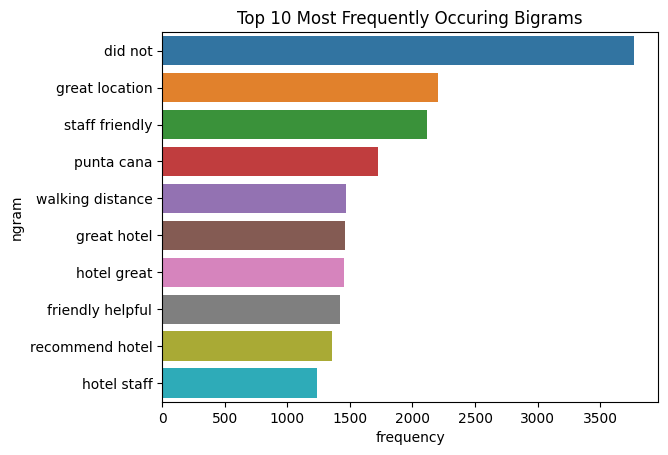

In [ ]:
# Creating BarPlot
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [ ]:
# Creating Trigrams
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['Review'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

In [ ]:
# Creating BarPlot
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

In [ ]:
# the shape
print("X shape: ", x.shape)
print("y: shape ", y.shape)

X shape:  (20491, 35692)
y: shape  (20491,)


In [ ]:
# split the data train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print("X Train : ", x_train.shape)
print("X Test  : ", x_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (15368, 35692)
X Test  :  (5123, 35692)
Y Train :  (15368,)
Y Test  :  (5123,)


In [ ]:
#Defined object from library classification

LR = LogisticRegression()
AD = AdaBoostRegressor()
KNR = KNeighborsClassifier()
NB = MultinomialNB()

In [ ]:
LR.fit(x_train, y_train)
AD.fit(x_train, y_train)
KNR.fit(x_train,y_train)
NB.fit(x_train,y_train)

LR_Preds = LR.predict(x_test)
AD_Preds = AD.predict(x_test)
KNR_Preds = KNR.predict(x_test)
NB_Preds  = NB.predict(x_test)

LR_rmse = sqrt(mean_squared_error(y_test, LR_Preds))
AD_rmse = sqrt(mean_squared_error(y_test, AD_Preds))
KNR_rmse = sqrt(mean_squared_error(y_test, KNR_Preds))
NB_rmse = sqrt(mean_squared_error(y_test, NB_Preds))

LR_Scr = r2_score(y_test, LR_Preds)
AD_Scr = r2_score(y_test, AD_Preds)
KNR_Scr = r2_score(y_test, KNR_Preds)
NB_Scr = r2_score(y_test, NB_Preds)

print(LR_rmse, LR_Scr)
print(LR_rmse,KNR_rmse, NB_rmse, AD_rmse)
print(LR_Scr, KNR_Scr, NB_Scr, AD_Scr)

# Bert and Roberta

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import re
import string
from collections import Counter, defaultdict

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import nltk

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Helper Functions

In [ ]:
import re
from typing import Union, List

class CleanText():
    """ clearing text except digits () . , word character """

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text

def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

clean = CleanText()


In [ ]:
# label encode
def label_encode(x):
    if x == 1 or x == 2:
        return 0
    if x == 3:
        return 1
    if x == 5 or x == 4:
        return 2

# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"


# Read Data

In [ ]:
df = pd.read_csv("/home/jovyan/workspace/tripadvisor_hotel_reviews.csv")

In [ ]:
# encode label and mapping label name
df["label"] = df["Rating"].apply(lambda x: label_encode(x))
df["label_name"] = df["label"].apply(lambda x: label2name(x))

In [ ]:
# clean text, lowercase and remove punk
df["Review"] = df["Review"].apply(lambda x: remove_punct(clean(remove_emoji(x).lower())[0][0]))

# Token Counts with simple tokenizer
Finding out the number of tokens available for each sample will give us information about the length of our data. The classification algorithm we will use for a long text will not be the same as the algorithm used for a short text.

In [ ]:
# tokenize data
df["tokenized_review"] = df.Review.apply(lambda x: tokenize(x))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_review"].apply(lambda x: len(x.split()))

In [ ]:
(df.sent_token_length < 512).mean()

0.989117173393197

In [ ]:
! pip install transformers

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/9a/06/e4ec2a321e57c03b7e9345d709d554a52c33760e5015fdff0919d9459af0/transformers-4.35.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.1/123.1 kB 4.5 MB/s eta 0:00:00
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/81/54/84d42a0bee35edba99dee7b59a8d4970eccdd44b99fe728ed912106fc781/filelock-3.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for huggingface-hub<1.0,>=0.16.4 from https://files.pythonhosted.org/packages/ef/b5/b6107bd65fa4c96fdf00e4733e2fe5729bb9e5e09997f63074bb43d3ab28/huggingface_hub-0.18.0-py3-none-any.whl.metadata
  Using cached huggingface_hub-0.18.0-py3-none-any.whl.metadata (13 kB)
  Obtaining dependency information for tokenizers<0.15,>=0.14 from https://files.pythonhosted.org/packages/c5/c0/fab17cd02d68d4b62f09f47a30d03cd3e9acd0e59bbc23006d0a84a4989e/tokenizers-0.14.1-cp39-cp39-many

# Token Counts with BERT tokenizer
Since we will create a Transformers-based model, the value that BERT tokinezer will give us is very important. With the information here, the value of the seq_len parameter that we will use while encoding the data will be decided.

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

In [ ]:
# data tokenize with bert tokenizer
df["sent_bert_token_length"] = df["Review"].apply(lambda x: len(tokenizer(x, add_special_tokens=False)["input_ids"]))

Token indices sequence length is longer than the specified maximum sequence length for this model (658 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
# Less than 512 covers how many of the data
(df.sent_bert_token_length < 512).mean()


0.9853106241764678

#                                                   MODELS

# A brief information about BERT


BERT makes use of Transformer, an attention mechanism that learns contextual relations between words (or sub-words) in a text. In its vanilla form, Transformer includes two separate mechanisms — an encoder that reads the text input and a decoder that produces a prediction for the task. Since BERT’s goal is to generate a language model, only the encoder mechanism is necessary.

BERT is a bi-directional transformer for pre-training over a lot of unlabeled textual data to learn a language representation that can be used to fine-tune for specific machine learning tasks. While BERT outperformed the NLP state-of-the-art on several challenging tasks, its performance improvement could be attributed to the bidirectional transformer, novel pre-training tasks of Masked Language Model and Next Structure Prediction along with a lot of data and Google’s compute power.

The detailed workings of Transformer are described in a paper by Google.



A brief information about XLNET


XLNet is a large bidirectional transformer that uses improved training methodology, larger data and more computational power to achieve better than BERT prediction metrics on 20 language tasks.

To improve the training, XLNet introduces permutation language modeling, where all tokens are predicted but in random order. This is in contrast to BERT’s masked language model where only the masked (15%) tokens are predicted. This is also in contrast to the traditional language models, where all tokens were predicted in sequential order instead of random order. This helps the model to learn bidirectional relationships and therefore better handles dependencies and relations between words. In addition, Transformer XL was used as the base architecture, which showed good performance even in the absence of permutation-based training.

XLNet was trained with over 130 GB of textual data and 512 TPU chips running for 2.5 days, both of which ar e much larger than BERT.



A brief information about RoBERTa
RoBERTa. Introduced at Facebook, Robustly optimized BERT approach RoBERTa, is a retraining of BERT with improved training methodology, 1000% more data and compute power.

To improve the training procedure, RoBERTa removes the Next Sentence Prediction (NSP) task from BERT’s pre-training and introduces dynamic masking so that the masked token changes during the training epochs. Larger batch-training sizes were also found to be more useful in the training procedure.

Importantly, RoBERTa uses 160 GB of text for pre-training, including 16GB of Books Corpus and English Wikipedia used in BERT. The additional data included CommonCrawl News dataset (63 million articles, 76 GB), Web text corpus (38 GB) and Stories from Common Crawl (31 GB). This coupled with whopping 1024 V100 Tesla GPU’s running for a day, led to pre-training of RoBERTa.


Comparison of Transformer Models


        source = https://towardsdatascience.com/bert-roberta-distilbert-xlnet-which-one-to-use-3d5ab82ba5f8
In this table, the models are compared under 5 headings, let's take them all one by one.

When we look at the sizes of the models, BERT, RoBERTa and XLNet have the same values, while the size of the DistillBERT is smaller.

The biggest factor that determines Training Times is the size of the models and the data they have. As you can imagine, the time increases as the size increases :).

When we look at the performance, BERT considers the model as the base model. RoBERTa offers 2-20% better performance than BERT. A similar performance applies to XLNet. XLNet performs 2-15% better than BERT model. DisltiBERT, despite its small size, is not equally poor in performance. It performs only 3% worse.

When we look at its data, the model with the largest corpus is ROBERTa. It is followed by XLNET, then BERT and DistilBERT have the same data. One of the reasons for the higher performance of RoBERTa and XLNet is that the datasets are so high.

As it is known, there are MLM and NSP tasks in the BERT model. The RoBERTa model is the trained version of the BERT model without the NSP task. DiltilBERT is a reduced number of parameters of BERT, it maintains 97% performance, but uses only half the number of parameters (paper). To enhance the training, XLNet offers permutation language modeling where all tokens are predicted but in random order.

# Preprocess for BERT Train

In [ ]:
import pandas as pd
import numpy as np
import os
import random
from pathlib import Path
import json

In [ ]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

In [ ]:
class Config():
    seed_val = 17
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    epochs = 5
    batch_size = 6
    seq_length = 512
    lr = 2e-5
    eps = 1e-8
    pretrained_model = 'bert-base-uncased'
    test_size=0.15
    random_state=42
    add_special_tokens=True
    return_attention_mask=True
    pad_to_max_length=True
    do_lower_case=False
    return_tensors='pt'

config = Config()

In [ ]:
# params will be saved after training
params = {"seed_val": config.seed_val,
    "device":str(config.device),
    "epochs":config.epochs,
    "batch_size":config.batch_size,
    "seq_length":config.seq_length,
    "lr":config.lr,
    "eps":config.eps,
    "pretrained_model": config.pretrained_model,
    "test_size":config.test_size,
    "random_state":config.random_state,
    "add_special_tokens":config.add_special_tokens,
    "return_attention_mask":config.return_attention_mask,
    "pad_to_max_length":config.pad_to_max_length,
    "do_lower_case":config.do_lower_case,
    "return_tensors":config.return_tensors,
         }

In [ ]:
# set random seed and device
import random

device = config.device

random.seed(config.seed_val)
np.random.seed(config.seed_val)
torch.manual_seed(config.seed_val)
torch.cuda.manual_seed_all(config.seed_val)

# Train and Validation Split

In [ ]:
#split train test
from sklearn.model_selection import train_test_split

train_df_, val_df = train_test_split(df,
                                    test_size=0.10,
                                    random_state=config.random_state,
                            stratify=df.label.values)

In [ ]:
train_df, test_df = train_test_split(train_df_,
                                    test_size=0.10,
                                    random_state=42,
                            stratify=train_df_.label.values)

In [ ]:
# count of unique label  control
print(len(train_df['label'].unique()))
print(train_df.shape)

3
(16596, 7)


In [ ]:
# count of unique label  control
print(len(val_df['label'].unique()))
print(val_df.shape)

3
(2050, 7)


In [ ]:
print(len(test_df['label'].unique()))
print(test_df.shape)

3
(1845, 7)


# BertTokenizer and Encoding the Data

In [ ]:
# create tokenizer
tokenizer = BertTokenizer.from_pretrained(config.pretrained_model,
                                          do_lower_case=config.do_lower_case)

In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    train_df.Review.values,
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors
)
encoded_data_val = tokenizer.batch_encode_plus(
    val_df.Review.values,
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train_df.label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(val_df.label.values)

In [ ]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

# Creating the Model
bert-base-uncased is a smaller pre-trained model.

Using num_labels to indicate the number of output labels.

In [ ]:
model = BertForSequenceClassification.from_pretrained(config.pretrained_model,
                                                      num_labels=3,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Data Loaders
DataLoader combines a dataset and a sampler, and provides an iterable over the given dataset.

We use RandomSampler for training and SequentialSampler for validation.

Given the limited memory in my environment, I set batch_size=64.

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=config.batch_size)

dataloader_validation = DataLoader(dataset_val,
                                   sampler=SequentialSampler(dataset_val),
                                   batch_size=config.batch_size)

# Optimizer & Scheduler

In [ ]:
    from transformers import AdamW, get_linear_schedule_with_warmup

    optimizer = AdamW(model.parameters(),
                      lr=config.lr,
                      eps=config.eps)


    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0,
                                                num_training_steps=len(dataloader_train)*config.epochs)

# Performance Metrics
We will use f1 score as performance metrics.

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels, label_dict):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

# Training Loop

In [ ]:
def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(config.device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    # calculate avareage val loss
    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [ ]:
config.device

device(type='cuda', index=0)

In [ ]:
model.to(config.device)

for epoch in tqdm(range(1, config.epochs+1)):

    model.train()

    loss_train_total = 0
    # allows you to see the progress of the training
    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)

    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(config.device) for b in batch)


        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    torch.save(model.state_dict(), f'_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')

    tqdm.write(f'F1 Score (Weighted): {val_f1}');
# save model params and other configs
with Path('params.json').open("w") as f:
    json.dump(params, f, ensure_ascii=False, indent=4)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/2766 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.4339524348302534
Validation loss: 0.32022634135934996
F1 Score (Weighted): 0.8786748012248684


Epoch 2:   0%|          | 0/2766 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.3274450437554269
Validation loss: 0.37503652609200544
F1 Score (Weighted): 0.8788879516822001


Epoch 3:   0%|          | 0/2766 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.24253563274499698
Validation loss: 0.49030379335794594
F1 Score (Weighted): 0.8795153493276829


Epoch 4:   0%|          | 0/2766 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.15339910562673764
Validation loss: 0.6361563481336098
F1 Score (Weighted): 0.8822506333282417


Epoch 5:   0%|          | 0/2766 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.08804768551745218
Validation loss: 0.720714145299178
F1 Score (Weighted): 0.8824912319969626


# Test on validation set

In [ ]:
model.load_state_dict(torch.load(f'./_BERT_epoch_3.model', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
from sklearn.metrics import classification_report

preds_flat = np.argmax(predictions, axis=1).flatten()
print(classification_report(preds_flat, true_vals))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       305
           1       0.50      0.49      0.50       223
           2       0.95      0.95      0.95      1522

    accuracy                           0.88      2050
   macro avg       0.76      0.76      0.76      2050
weighted avg       0.88      0.88      0.88      2050



# ERROR ANALYSIS

In [ ]:
# step by step predictions on dataframe
# We do this to view predictions in the pandas dataframe and easily filter them and perform error analysis.

pred_final = []

for i, row in tqdm(val_df.iterrows(), total=val_df.shape[0]):
    predictions = []

    review = row["Review"]
    encoded_data_test_single = tokenizer.batch_encode_plus(
    [review],
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors
    )
    input_ids_test = encoded_data_test_single['input_ids']
    attention_masks_test = encoded_data_test_single['attention_mask']


    inputs = {'input_ids':      input_ids_test.to(device),
              'attention_mask':attention_masks_test.to(device),
             }

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)
    predictions = np.concatenate(predictions, axis=0)
    pred_final.append(np.argmax(predictions, axis=1).flatten()[0])

  0%|          | 0/2050 [00:00<?, ?it/s]

In [ ]:
# add pred into val_df
val_df["pred"] = pred_final

In [ ]:
#  Add control column for easier wrong and right predictions
control = val_df.pred.values == val_df.label.values
val_df["control"] = control

In [ ]:
# filtering false predictions
val_df = val_df[val_df.control == False]

In [ ]:
# buraları düzenle bbaaaabbaaaaa
# label to intent mapping
name2label = {"Negative":0,
              "Neutral":1,
             "Positive":2
             }
label2name = {v: k for k, v in name2label.items()}

val_df["pred_name"] = val_df.pred.apply(lambda x: label2name.get(x))

In [ ]:
from sklearn.metrics import confusion_matrix

# We create a confusion matrix to better observe the classes that the model confuses.
pred_name_values = val_df.pred_name.values
label_values = val_df.label_name.values
confmat = confusion_matrix(label_values, pred_name_values, labels=list(name2label.keys()))

In [ ]:
confmat

array([[ 0, 52, 12],
       [31,  0, 86],
       [12, 49,  0]])

In [ ]:
df_confusion_val = pd.crosstab(label_values, pred_name_values)
df_confusion_val

col_0     Negative  Neutral  Positive
row_0                                
Negative         0       52        12
Neutral         31        0        86
Positive        12       49         0

In [ ]:
# save confissuan matrix df
df_confusion_val.to_csv("val_df_confusion.csv")

# INFERENCE

In [ ]:
test_df.head()

Review  Rating  label  \
2298   great location nice hotel family 5 stayed june...       4      2   
9503   welcoming spotless just returned 2nd visit bar...       5      2   
14742  beautiful resort beautiful gardens friendly st...       3      1   
4140   cheaply renovated wo n t going aside beautiful...       2      0   
3552   nothing spectacular time dr time doing inclusi...       3      1   

      label_name                                   tokenized_review  \
2298    Positive  great location nice hotel family 5 stayed june...   
9503    Positive  welcoming spotless just returned 2 nd visit ba...   
14742    Neutral  beautiful resort beautiful gardens friendly st...   
4140    Negative  cheaply renovated wo n t going aside beautiful...   
3552     Neutral  nothing spectacular time dr time doing inclusi...   

       sent_token_length  sent_bert_token_length  
2298                  38                      39  
9503                  68                      77  
14742                 81                      86  
4140                 104                     113  
3552                 110                     128

In [ ]:
encoded_data_test = tokenizer.batch_encode_plus(
    test_df.Review.values,
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors
)

In [ ]:
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(test_df.label.values)

In [ ]:
model = BertForSequenceClassification.from_pretrained(config.pretrained_model,
                                                      num_labels=3,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(config.device)

model.load_state_dict(torch.load(f'./_BERT_epoch_3.model', map_location=torch.device('cpu')))

_, predictions_test, true_vals_test = evaluate(dataloader_validation)
# accuracy_per_class(predictions, true_vals, intent2label)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import classification_report

preds_flat_test = np.argmax(predictions_test, axis=1).flatten()
print(classification_report(preds_flat_test, true_vals_test))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       301
           1       0.46      0.50      0.48       202
           2       0.96      0.94      0.95      1547

    accuracy                           0.88      2050
   macro avg       0.74      0.76      0.75      2050
weighted avg       0.89      0.88      0.88      2050



In [ ]:
pred_final = []

for i, row in tqdm(test_df.iterrows(), total=test_df.shape[0]):
    predictions = []

    review = row["Review"]
    encoded_data_test_single = tokenizer.batch_encode_plus(
    [review],
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors
    )
    input_ids_test = encoded_data_test_single['input_ids']
    attention_masks_test = encoded_data_test_single['attention_mask']


    inputs = {'input_ids':      input_ids_test.to(device),
              'attention_mask':attention_masks_test.to(device),
             }

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)
    predictions = np.concatenate(predictions, axis=0)
    pred_final.append(np.argmax(predictions, axis=1).flatten()[0])

  0%|          | 0/1845 [00:00<?, ?it/s]

In [ ]:
# add pred into test
test_df["pred"] = pred_final

In [ ]:
#  Add control column for easier wrong and right predictions
control = test_df.pred.values == test_df.label.values
test_df["control"] = control

In [ ]:
# filtering false predictions
test_df = test_df[test_df.control == False]

In [ ]:
test_df["pred_name"] = test_df.pred.apply(lambda x: label2name.get(x))

In [ ]:
from sklearn.metrics import confusion_matrix

# We create a confusion matrix to better observe the classes that the model confuses.
pred_name_values = test_df.pred_name.values
label_values = test_df.label_name.values
confmat = confusion_matrix(label_values, pred_name_values, labels=list(name2label.keys()))

In [ ]:
confmat

array([[ 0, 47, 25],
       [48,  0, 78],
       [ 7, 49,  0]])

In [ ]:
df_confusion_test = pd.crosstab(label_values, pred_name_values)
df_confusion_test

col_0     Negative  Neutral  Positive
row_0                                
Negative         0       47        25
Neutral         48        0        78
Positive         7       49         0

# References

Data: Tripadvisor

BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding

RoBERTa: A Robustly Optimized BERT Pretraining Approach

XLNet: Generalized Autoregressive Pretraining for Language Understanding